# Code for Classical Cellular Automata for Rule 30

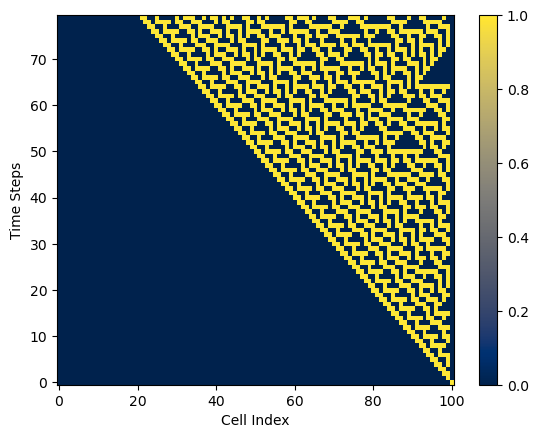

In [10]:
import numpy as np
import matplotlib.pyplot as plt

rule = {(0, 0, 0): 0, (0, 0, 1): 1, (0, 1, 0): 1, (0, 1, 1): 1, (1, 0, 0): 1, (1, 0, 1): 0, (1, 1, 0): 0, (1, 1, 1): 0}

def next_generation(state):
    new_state = np.zeros_like(state)
    for i in range(1, len(state)-1):
        neighbour = tuple(state[i-1:i+2])
        new_state[i] = rule[neighbour]
    return new_state

def generate_automaton(generations, initial_state):
    automaton = np.zeros((generations, len(initial_state)), dtype=int)
    automaton[0, :] = initial_state
    for i in range(1, generations):
        automaton[i, :] = next_generation(automaton[i-1, :])
    return automaton

initial_state = np.zeros(101, dtype=int)
initial_state[100] = 1

# Generate the Rule 30 cellular automaton with 80 time steps
generations = 80
automaton = generate_automaton(generations, initial_state)

# Plot the cellular automaton
plt.imshow(automaton, cmap='cividis', aspect='auto', origin='lower')
plt.xlabel('Cell Index')
plt.ylabel('Time Steps')
plt.colorbar()
plt.show()


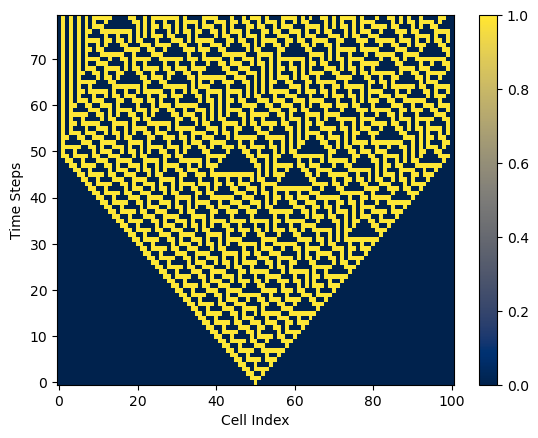

In [11]:
import numpy as np
import matplotlib.pyplot as plt

rule = {(0, 0, 0): 0, (0, 0, 1): 1, (0, 1, 0): 1, (0, 1, 1): 1, (1, 0, 0): 1, (1, 0, 1): 0, (1, 1, 0): 0, (1, 1, 1): 0}

def next_generation(state):
    new_state = np.zeros_like(state)
    for i in range(1, len(state)-1):
        neighbour = tuple(state[i-1:i+2])
        new_state[i] = rule[neighbour]
    return new_state

def generate_automaton(generations, initial_state):
    automaton = np.zeros((generations, len(initial_state)), dtype=int)
    automaton[0, len(initial_state)//2] = 1  # Set the middle cell to 1
    for i in range(1, generations):
        automaton[i, :] = next_generation(automaton[i-1, :])
    return automaton

initial_state = np.zeros(101, dtype=int)

# Generate the Rule 30 cellular automaton with 80 time steps
generations = 80
automaton = generate_automaton(generations, initial_state)

# Plot the cellular automaton
plt.imshow(automaton, cmap='cividis', aspect='auto', origin='lower')
plt.xlabel('Cell Index')
plt.ylabel('Time Steps')
plt.colorbar()
plt.show()


In [1]:
!pip install qiskit

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 5.2/5.2 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 116.3/116.3 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 5.5 MB/s eta 0:00:00
  Using cached stevedore-5.1.0-py3-none-any.whl (49 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Using cached pbr-6.0.0-py2.py3-none-any.whl (107 kB)
     -------------------------------------- 536.2/536.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Code for Toy Model

In [26]:
import numpy as np
from scipy.linalg import expm


# Defining Pauli matrices and Hadamard matrix
Id = np.identity(4)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])


# Kronecker product
def kron(a, b):
    return np.kron(a, b)

def kron(*matrices):
    result = matrices[0]
    for matrix in matrices[1:]:
        result = np.kron(result, matrix)
    return result

# Defining Basis Vecotr in Z and X basis
u, d = np.array([0, 1]), np.array([1, 0])
r, l = (1 / np.sqrt(2)) * (u + d), (1 / np.sqrt(2)) * (u - d)

# Initial state of the system as |+−+−⟩
psi = kron(r, l, r, l)
print(psi)

## Generation 1 ##

# Unitary operators
Z1 = kron(Z, np.identity(2))
H2 = kron(np.identity(2), H)
CH = expm(-1j * np.pi / 4 * (Id - Z1) @ (Id - H2)).astype(np.complex128)

#CH matrix
print(CH)

# Projective Measurement
Pd = np.array([[0, 0], [0, 1]])
Pd3 = kron(Id, Id, Pd, Id)
U1 = kron(CH, CH)
phi_1e = U1 @ psi

print(Pd)
print(Pd3)
print(U1)
print(phi_1e)

# Check dimensions
print("phi_1e.shape:", phi_1e.shape)
print("Pd3.shape:", Pd3.shape)

# Calculate probability
p1 = np.real(np.conjugate(phi_1e).T @ phi_1e)

print(p1)

# Normalize state
phi_1m = Pd3 @ phi_1e #/ np.sqrt(p1)

# Display normalized state
#print(phi_1m)


[ 0.25 -0.25  0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25  0.25 -0.25
 -0.25  0.25 -0.25  0.25]
[[ 1.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  1.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678-2.22044605e-16j  0.70710678+2.22044605e-16j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678-9.36455437e-17j]]
[[0 0]
 [0 1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[ 1.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 128)

In [23]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Important Constants
u, d = np.array([1, 0]), np.array([0, 1])
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

Id = np.eye(2)
X, Y, Z, H = np.array([[0, 1], [1, 0]]), np.array([[0, -1j], [1j, 0]]), np.array([[1, 0], [0, -1]]), 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])

CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]])

Pd = np.array([[0, 0],
               [0, 1]])

# Initial State of the system as |+−+−⟩
psi = np.kron(np.kron(r, l), np.kron(r, l))

## Generation 1 ##

# Unitary Operators
U1 = np.kron(CH, CH)
phi1e = U1 @ psi

# Projective Measurement
Pd3 = np.kron(np.kron(Id, Id), np.kron(Pd, Id))
p1 = np.real(np.conj(phi1e).T @ Pd3 @ phi1e)
phi1m = Pd3 @ phi1e / np.sqrt(p1)

print(phi1m)


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.00000000e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.48630560e-32
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.07106781e-01]


# Fidelity

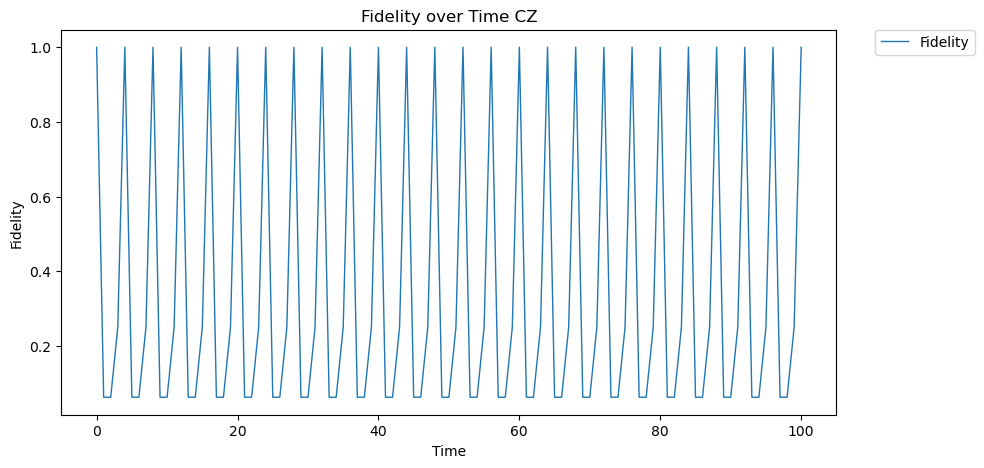

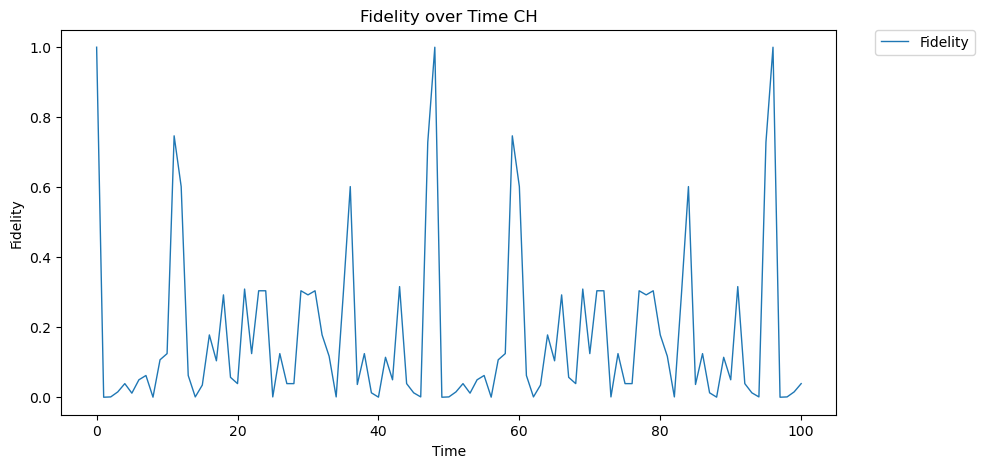

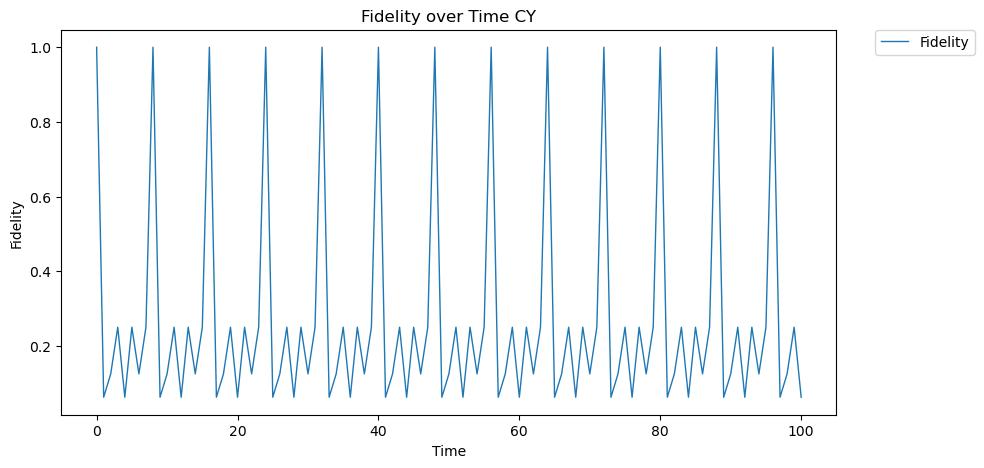

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import kron

# Define the ket function to create basis vectors
def ket(index, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[index-1, 0] = 1
    return vec

# Define the states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the gates
Id, X, Y, Z, H = np.eye(2, dtype=int), np.array([[0, 1], [1, 0]]), np.array([[0, -1j], [1j, 0]]), np.array([[1, 0], [0, -1]]), 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])

# Define controlled gates
CY = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, -1j], [0, 0, 1j, 0]])
CZ = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])
CH = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)], [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]])

# Create the initial state
psi = kron(kron(r, l), kron(r, l))

# Define the state evolution function
def state_evolution_Z(state, no_of_generations):
    odd_gen_mat = kron(CZ, CZ)
    even_gen_mat = kron(kron(Id, CZ), Id)
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state
def state_evolution_H(state, no_of_generations):
    odd_gen_mat = kron(CH, CH)
    even_gen_mat = kron(kron(Id, CH), Id)
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state
def state_evolution_Y(state, no_of_generations):
    odd_gen_mat = kron(CY, CY)
    even_gen_mat = kron(kron(Id, CY), Id)
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state

# Define the fidelity function
def fidelity(initial_state, final_state):
    return abs(np.vdot(initial_state, final_state))**2

# Generate the time points and calculate fidelity at each point
time = np.arange(0, 101, 1)
fidelity_plot_Z = [fidelity(state_evolution_Z(psi, t), psi) for t in time]

# Plot the fidelity
plt.figure(figsize=(10, 5))
plt.plot(time, fidelity_plot_Z, label="Fidelity", lw = 1)
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity over Time CZ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

time = np.arange(0, 101, 1)
fidelity_plot_H = [fidelity(state_evolution_H(psi, t), psi) for t in time]

# Plot the fidelity
plt.figure(figsize=(10, 5))
plt.plot(time, fidelity_plot_H, label="Fidelity", lw = 1)
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity over Time CH')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

time = np.arange(0, 101, 1)
fidelity_plot_Y = [fidelity(state_evolution_Y(psi, t), psi) for t in time]

# Plot the fidelity
plt.figure(figsize=(10, 5))
plt.plot(time, fidelity_plot_Y, label="Fidelity", lw = 1)
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity over Time CY')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


# Fidelity for Asymmetric Circuits

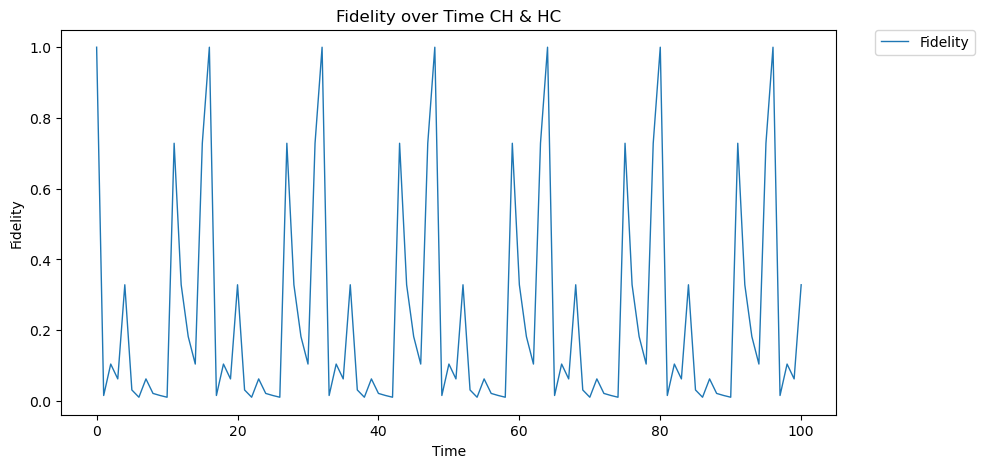

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import kron

# Define the ket function to create basis vectors
def ket(index, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[index-1, 0] = 1
    return vec

# Define the states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the gates
Id, X, Y, Z, H = np.eye(2, dtype=int), np.array([[0, 1], [1, 0]]), np.array([[0, -1j], [1j, 0]]), np.array([[1, 0], [0, -1]]), 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])

# Define controlled gates
CY = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, -1j], [0, 0, 1j, 0]])
CZ = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])
CH = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)], [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]])
HC =  np.array([[1, 0, 0, 0],
               [0, 1/np.sqrt(2), 0, 1/np.sqrt(2)],
               [0, 0, 1, 0],
               [0, 1/np.sqrt(2), 0, -1/np.sqrt(2)]], dtype=complex)
# Create the initial state
psi = kron(kron(r, l), kron(r, l))


def state_evolution_H(state, no_of_generations):
    odd_gen_mat = kron(HC, CH)
    even_gen_mat = kron(kron(Id, CH), Id)
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state


# Define the fidelity function
def fidelity(initial_state, final_state):
    return abs(np.vdot(initial_state, final_state))**2

# Generate the time points and calculate fidelity at each point
time = np.arange(0, 101, 1)
fidelity_plot_H = [fidelity(state_evolution_H(psi, t), psi) for t in time]

# Plot the fidelity
plt.figure(figsize=(10, 5))
plt.plot(time, fidelity_plot_H, label="Fidelity", lw = 1)
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity over Time CH & HC')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

# Fidelity For Randomised Circuits

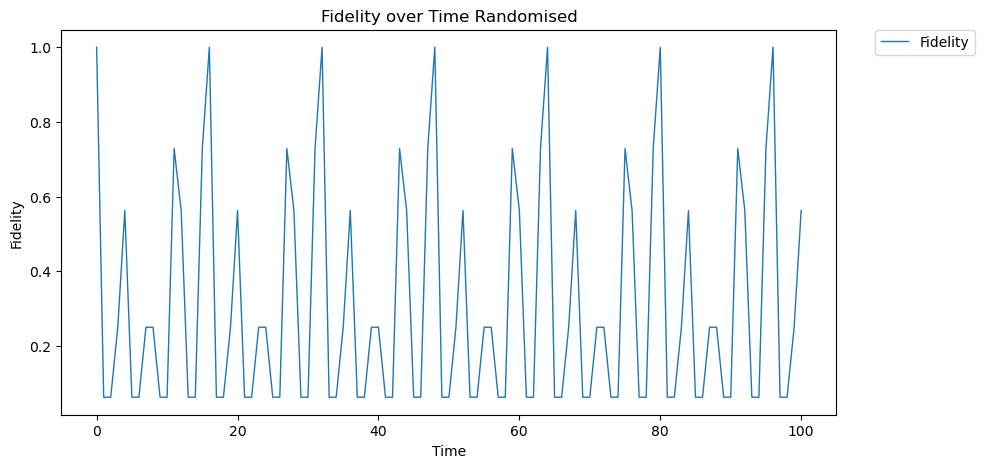

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import kron

# Define the ket function to create basis vectors
def ket(index, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[index-1, 0] = 1
    return vec

# Define the states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the gates
Id, X, Y, Z, H = np.eye(2, dtype=int), np.array([[0, 1], [1, 0]]), np.array([[0, -1j], [1j, 0]]), np.array([[1, 0], [0, -1]]), 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])

# Define controlled gates
CY = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, -1j], [0, 0, 1j, 0]])
CZ = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])
CH = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)], [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]])
HC =  np.array([[1, 0, 0, 0],
               [0, 1/np.sqrt(2), 0, 1/np.sqrt(2)],
               [0, 0, 1, 0],
               [0, 1/np.sqrt(2), 0, -1/np.sqrt(2)]], dtype=complex)
# Create the initial state
psi = kron(kron(r, l), kron(r, l))


def state_evolution_R(state, no_of_generations):
    odd_gen_mat = kron(CZ, CY)
    even_gen_mat = kron(kron(Id, CH), Id)
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state


# Define the fidelity function
def fidelity(initial_state, final_state):
    return abs(np.vdot(initial_state, final_state))**2

# Generate the time points and calculate fidelity at each point
time = np.arange(0, 101, 1)
fidelity_plot_R = [fidelity(state_evolution_R(psi, t), psi) for t in time]

# Plot the fidelity
plt.figure(figsize=(10, 5))
plt.plot(time, fidelity_plot_R, label="Fidelity", lw = 1)
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity over Time Randomised')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

# Operator Spread

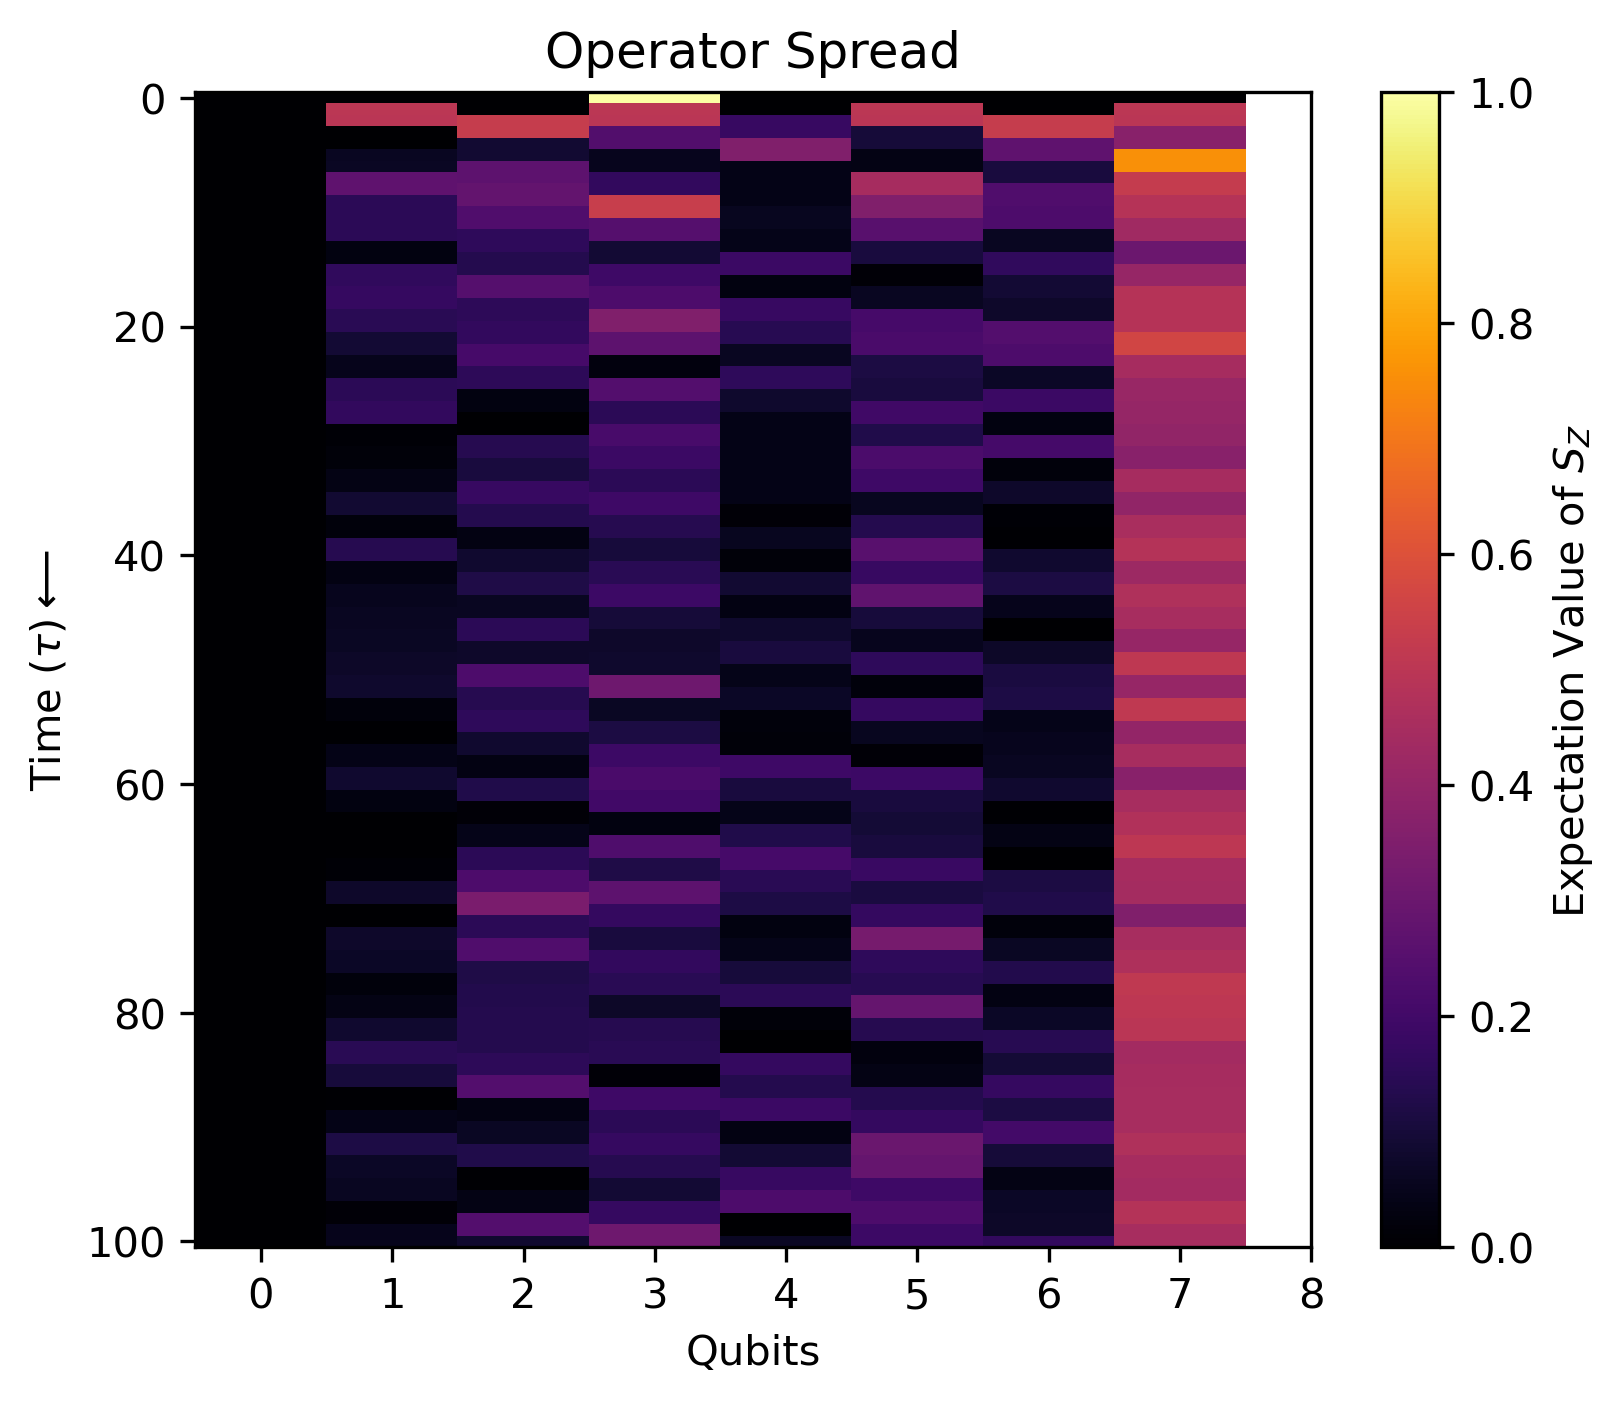

In [3]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(r, l), l), u), r), l), r), l)  # Initial state

# Define the state evolution function
def state_evolution(state, no_of_generations):
    odd_gen_mat = kron(kron(kron(CH, CH), CH), CH)
    even_gen_mat = kron(kron(kron(Id, CH), CH), kron(CH, Id))
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = np.dot(odd_gen_mat, final_state)                                     # odd_gen_mat @ final_state
        else:
            final_state = np.dot(even_gen_mat, final_state)                                     # even_gen_mat @ final_state
    return final_state

# Define the expectation value function
def expectation_value(state, operator):
    # Calculate the expectation value of the operator with the given state
    expectation = np.dot(np.conj(state).T, np.dot(operator, state))
    return np.abs(expectation) if np.abs(expectation) >= 1e-10 else 0

# Define the Sz matrices for the chain
Sz1 = kron(kron(kron(kron(kron(kron(kron(Sz, Id), Id), Id), Id), Id), Id), Id)
Sz2 = kron(kron(kron(kron(kron(kron(kron(Id, Sz), Id), Id), Id), Id), Id), Id)
Sz3 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Sz), Id), Id), Id), Id), Id)
Sz4 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Sz), Id), Id), Id), Id)
Sz5 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Sz), Id), Id), Id)
Sz6 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Sz), Id), Id)
Sz7 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Sz), Id)
Sz8 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Sz)

# Define the list of operators
operator_list = [Sz1, Sz2, Sz3, Sz4, Sz5, Sz6, Sz7, Sz8]

def expectation_value_chain(state, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    expectation_cells = np.zeros(no_of_qubits)
    for i in range(no_of_qubits):
        expectation_cells[i] = (expectation_value(state, list_of_operators[i]))
    return expectation_cells

def generate_matrix(state, generation, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    matrix_expect = np.zeros((generation + 1, no_of_qubits))
    matrix_expect[0, :] = expectation_value_chain(state, list_of_operators)
    for i in range(1, generation + 1):
        gen_state = state_evolution(state, i)
        matrix_expect[i, :] = expectation_value_chain(gen_state, list_of_operators)
    return matrix_expect

operator_spread = generate_matrix(ψ, 100, operator_list)

#Plotting the heatmap
plt.figure(figsize=(6, 5), dpi=300)
plt.imshow(operator_spread, cmap='inferno', aspect='auto')
plt.colorbar(label="Expectation Value of $S_Z$")
plt.xlabel("Qubits")
plt.ylabel("Time $(\\tau) \\longleftarrow$")
plt.xticks(np.arange(0, 9, step=1))
#plt.yticks(np.arange(0, operator_spread.shape[0], step=1))
plt.title("Operator Spread")
plt.savefig("spread-S")




In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import kron

# Define the ket function to create basis vectors
def ket(index, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[index-1, 0] = 1
    return vec

# Define the states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)
print(u)
print(d)
print(r)
print(l)

[[1.+0.j]
 [0.+0.j]]
[[0.+0.j]
 [1.+0.j]]
[[0.70710678+0.j]
 [0.70710678+0.j]]
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]


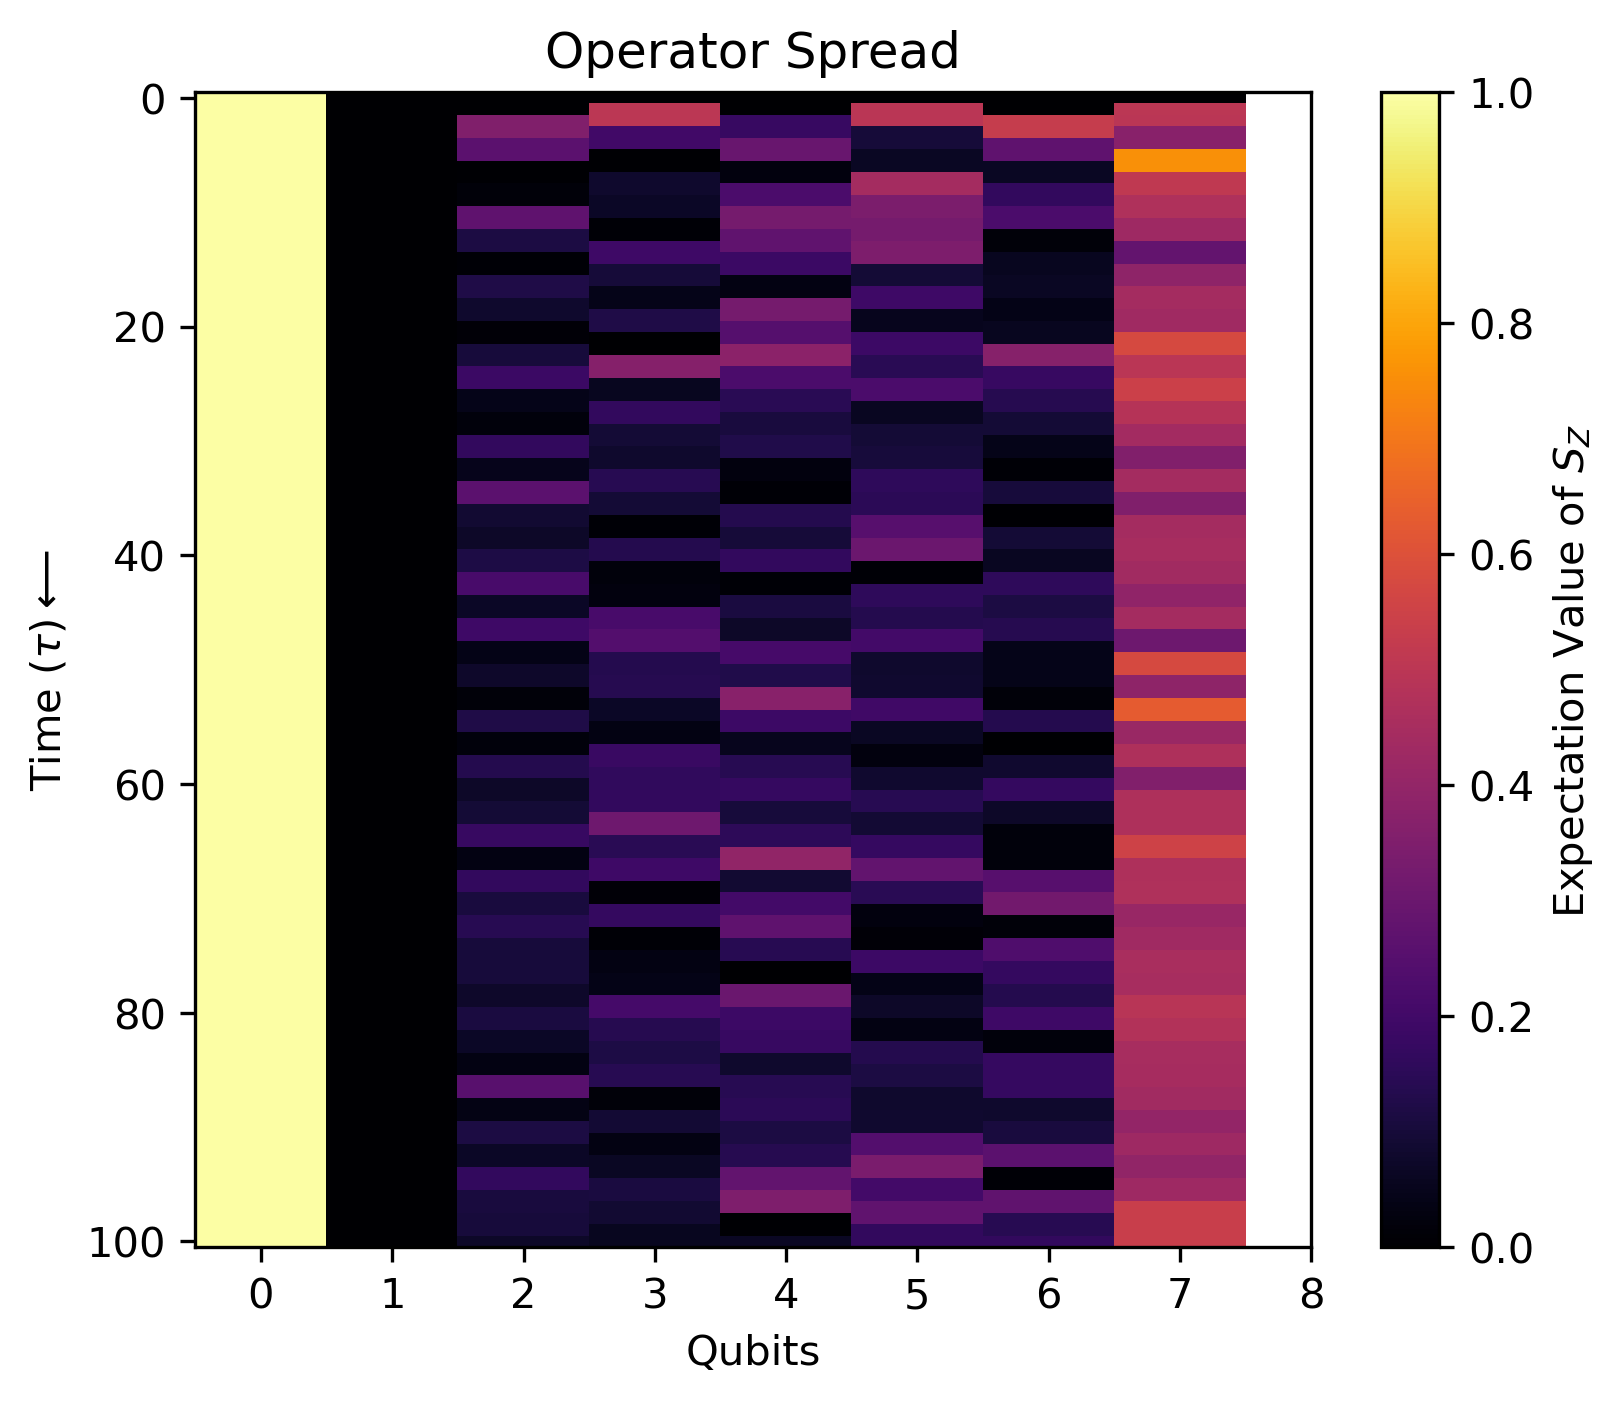

In [54]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(u, l), l), r), r), l), r), l)  # Initial state

# Define the state evolution function
def state_evolution(state, no_of_generations):
    odd_gen_mat = kron(kron(kron(CH, CH), CH), CH)
    even_gen_mat = kron(kron(kron(Id, CH), CH), kron(CH, Id))
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state

# Define the expectation value function
def expectation_value(state, operator):
    # Calculate the expectation value of the operator with the given state
    expectation = np.dot(np.conj(state).T, np.dot(operator, state))
    return np.abs(expectation) if np.abs(expectation) >= 1e-10 else 0

# Define the Sz matrices for the chain
Sz1 = kron(kron(kron(kron(kron(kron(kron(Sz, Id), Id), Id), Id), Id), Id), Id)                                                                                                                                                                                                                                                                                                                                                            
Sz2 = kron(kron(kron(kron(kron(kron(kron(Id, Sz), Id), Id), Id), Id), Id), Id)
Sz3 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Sz), Id), Id), Id), Id), Id)
Sz4 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Sz), Id), Id), Id), Id)
Sz5 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Sz), Id), Id), Id)
Sz6 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Sz), Id), Id)
Sz7 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Sz), Id)
Sz8 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Sz)

# Define the list of operators
operator_list = [Sz1, Sz2, Sz3, Sz4, Sz5, Sz6, Sz7, Sz8]

def expectation_value_chain(state, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    expectation_cells = np.zeros(no_of_qubits)
    for i in range(no_of_qubits):
        expectation_cells[i] = abs(expectation_value(state, list_of_operators[i]))
    return expectation_cells

def generate_matrix(state, generation, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    matrix_expect = np.zeros((generation + 1, no_of_qubits))
    matrix_expect[0, :] = expectation_value_chain(state, list_of_operators)
    for i in range(1, generation + 1):
        gen_state = state_evolution(state, i)
        matrix_expect[i, :] = expectation_value_chain(gen_state, list_of_operators)
    return matrix_expect

operator_spread = generate_matrix(ψ, 100, operator_list)

#Plotting the heatmap
plt.figure(figsize=(6, 5), dpi=300)
plt.imshow(operator_spread, cmap='inferno', aspect='auto')
plt.colorbar(label="Expectation Value of $S_Z$")
plt.xlabel("Qubits")
plt.ylabel("Time $(\\tau) \\longleftarrow$")
plt.xticks(np.arange(0, 9, step=1))
#plt.yticks(np.arange(0, operator_spread.shape[0], step=1))
plt.title("Operator Spread")
plt.savefig("spread-S")




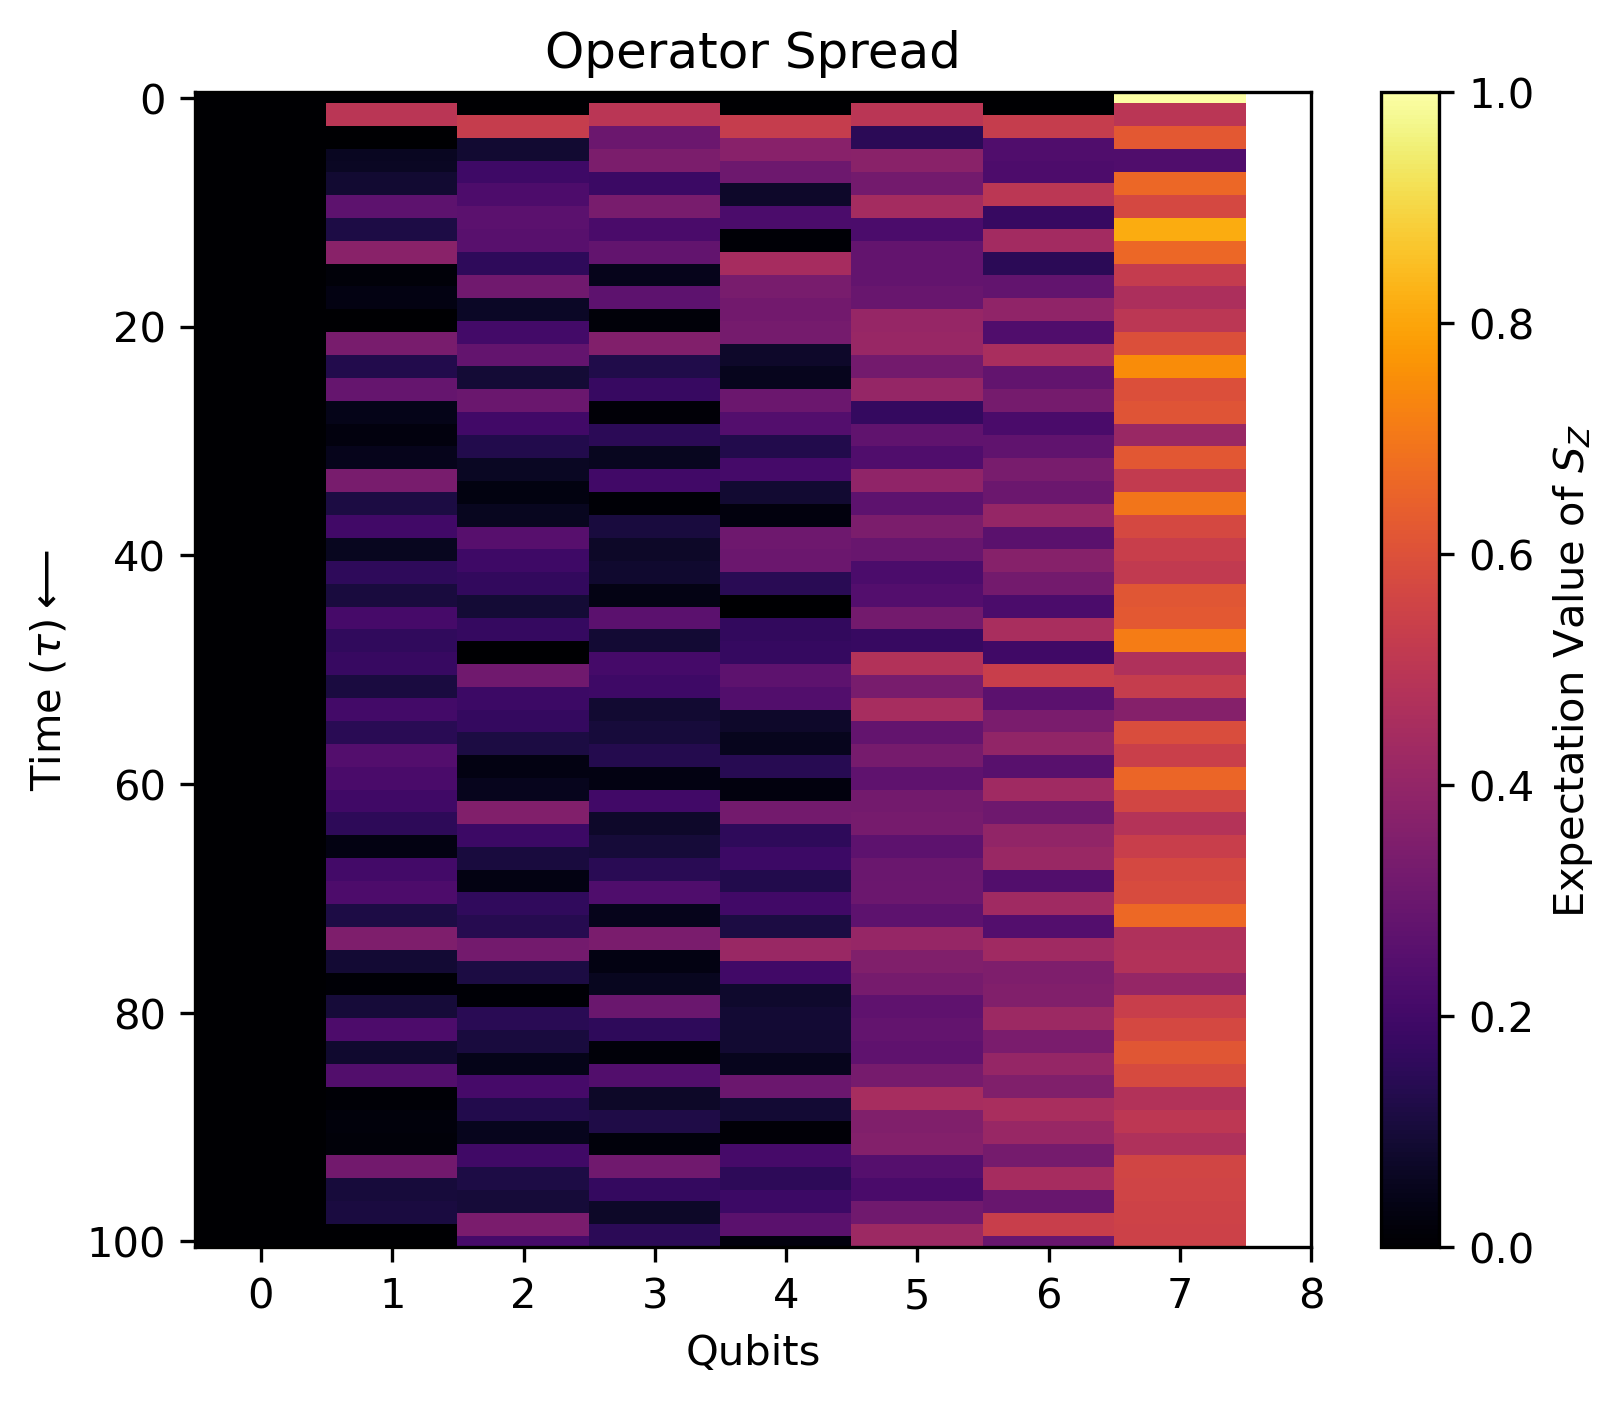

In [55]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(r, l), r), l), r), l), r), u)  # Initial state

# Define the state evolution function
def state_evolution(state, no_of_generations):
    odd_gen_mat = kron(kron(kron(CH, CH), CH), CH)
    even_gen_mat = kron(kron(kron(Id, CH), CH), kron(CH, Id))
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state

# Define the expectation value function
def expectation_value(state, operator):
    # Calculate the expectation value of the operator with the given state
    expectation = np.dot(np.conj(state).T, np.dot(operator, state))
    return np.abs(expectation) if np.abs(expectation) >= 1e-10 else 0

# Define the Sz matrices for the chain
Sz1 = kron(kron(kron(kron(kron(kron(kron(Sz, Id), Id), Id), Id), Id), Id), Id)
Sz2 = kron(kron(kron(kron(kron(kron(kron(Id, Sz), Id), Id), Id), Id), Id), Id)
Sz3 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Sz), Id), Id), Id), Id), Id)
Sz4 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Sz), Id), Id), Id), Id)
Sz5 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Sz), Id), Id), Id)
Sz6 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Sz), Id), Id)
Sz7 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Sz), Id)
Sz8 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Sz)

# Define the list of operators
operator_list = [Sz1, Sz2, Sz3, Sz4, Sz5, Sz6, Sz7, Sz8]

def expectation_value_chain(state, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    expectation_cells = np.zeros(no_of_qubits)
    for i in range(no_of_qubits):
        expectation_cells[i] = abs(expectation_value(state, list_of_operators[i]))
    return expectation_cells

def generate_matrix(state, generation, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    matrix_expect = np.zeros((generation + 1, no_of_qubits))
    matrix_expect[0, :] = expectation_value_chain(state, list_of_operators)
    for i in range(1, generation + 1):
        gen_state = state_evolution(state, i)
        matrix_expect[i, :] = expectation_value_chain(gen_state, list_of_operators)
    return matrix_expect

operator_spread = generate_matrix(ψ, 100, operator_list)

#Plotting the heatmap
plt.figure(figsize=(6, 5), dpi=300)
plt.imshow(operator_spread, cmap='inferno', aspect='auto')
plt.colorbar(label="Expectation Value of $S_Z$")
plt.xlabel("Qubits")
plt.ylabel("Time $(\\tau) \\longleftarrow$")
plt.xticks(np.arange(0, 9, step=1))
#plt.yticks(np.arange(0, operator_spread.shape[0], step=1))
plt.title("Operator Spread")
plt.savefig("spread-S")




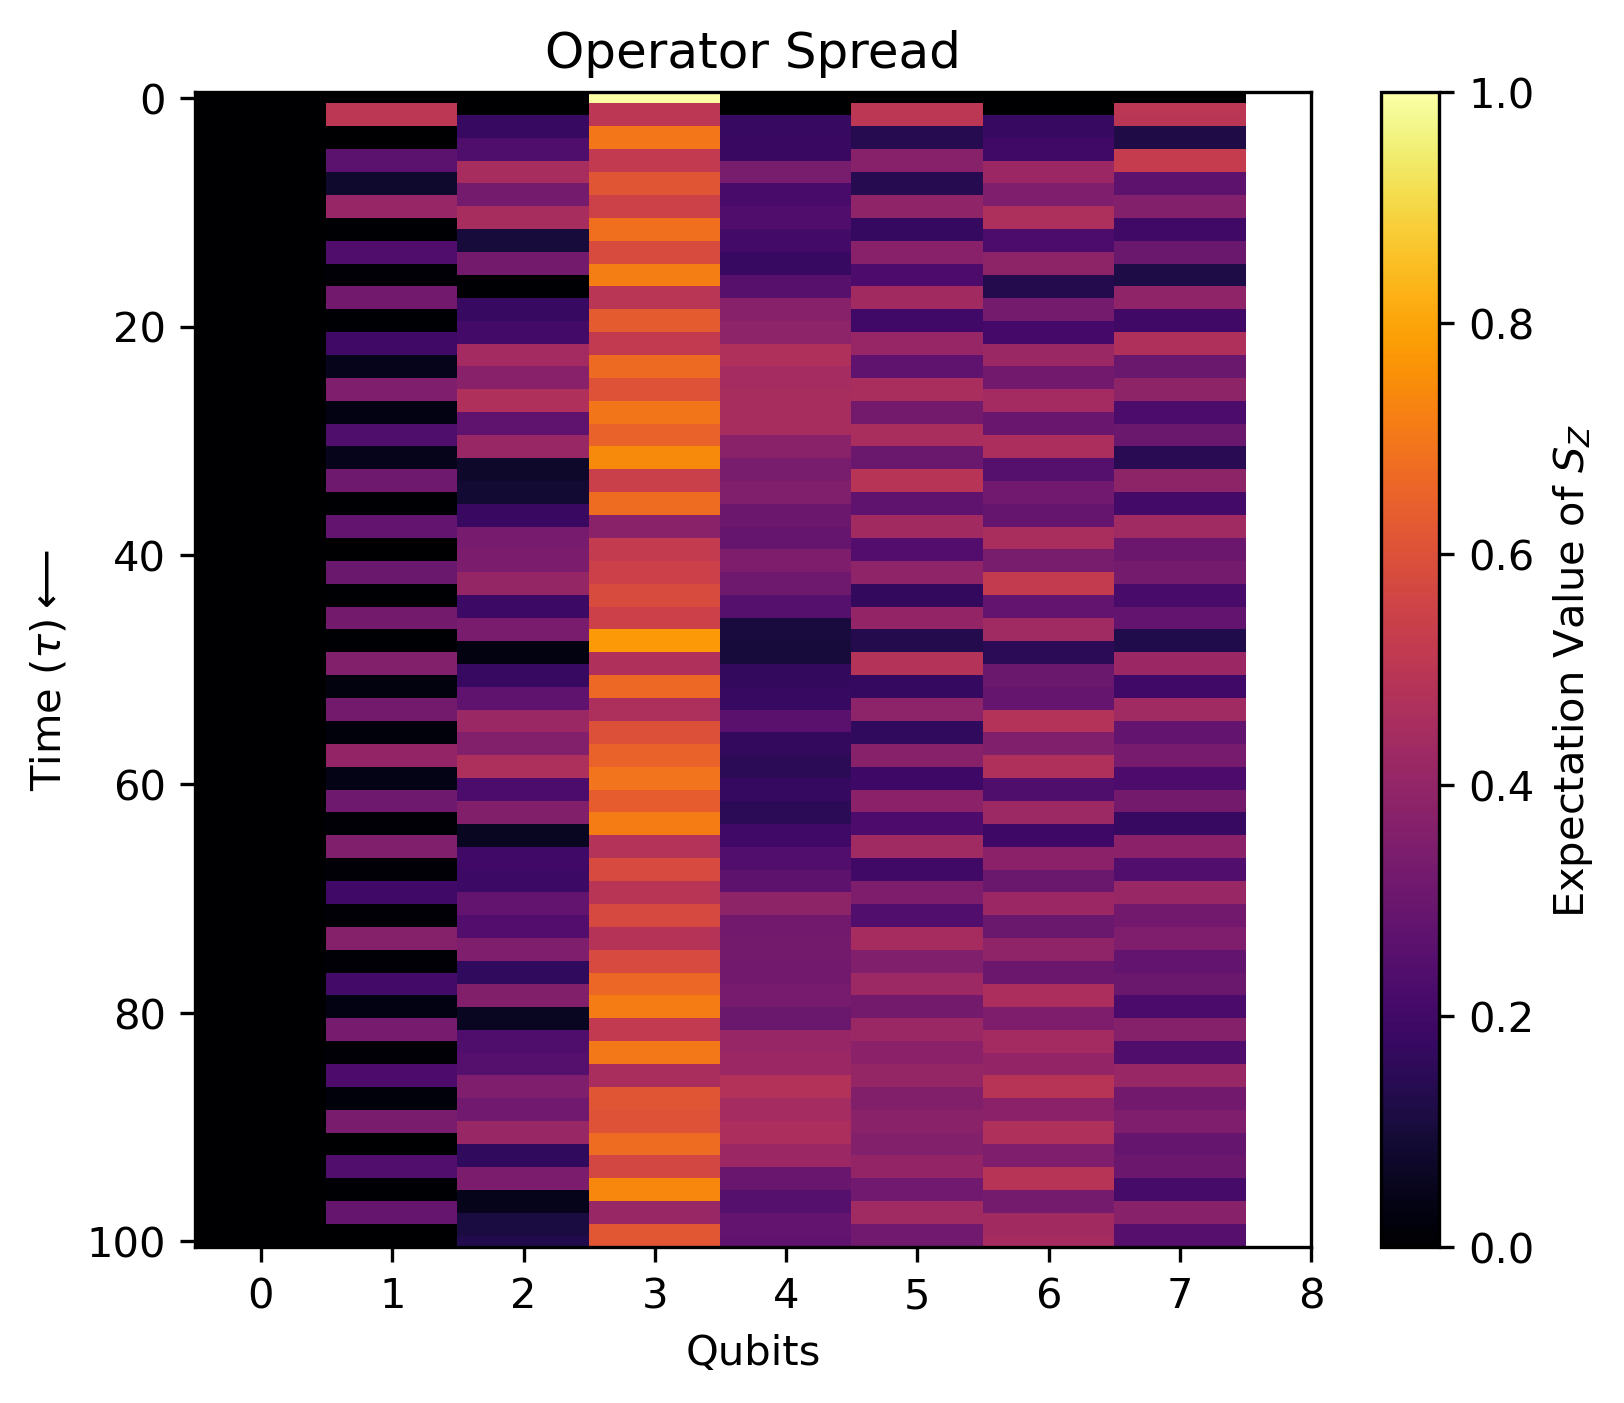

In [56]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(r, r), r), u), r), r), r), r)  # Initial state

# Define the state evolution function
def state_evolution(state, no_of_generations):
    odd_gen_mat = kron(kron(kron(CH, CH), CH), CH)
    even_gen_mat = kron(kron(kron(Id, CH), CH), kron(CH, Id))
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state

# Define the expectation value function
def expectation_value(state, operator):
    # Calculate the expectation value of the operator with the given state
    expectation = np.dot(np.conj(state).T, np.dot(operator, state))
    return np.abs(expectation) if np.abs(expectation) >= 1e-10 else 0

# Define the Sz matrices for the chain
Sz1 = kron(kron(kron(kron(kron(kron(kron(Sz, Id), Id), Id), Id), Id), Id), Id)
Sz2 = kron(kron(kron(kron(kron(kron(kron(Id, Sz), Id), Id), Id), Id), Id), Id)
Sz3 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Sz), Id), Id), Id), Id), Id)
Sz4 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Sz), Id), Id), Id), Id)
Sz5 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Sz), Id), Id), Id)
Sz6 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Sz), Id), Id)
Sz7 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Sz), Id)
Sz8 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Sz)

# Define the list of operators
operator_list = [Sz1, Sz2, Sz3, Sz4, Sz5, Sz6, Sz7, Sz8]

def expectation_value_chain(state, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    expectation_cells = np.zeros(no_of_qubits)
    for i in range(no_of_qubits):
        expectation_cells[i] = abs(expectation_value(state, list_of_operators[i]))
    return expectation_cells

def generate_matrix(state, generation, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    matrix_expect = np.zeros((generation + 1, no_of_qubits))
    matrix_expect[0, :] = expectation_value_chain(state, list_of_operators)
    for i in range(1, generation + 1):
        gen_state = state_evolution(state, i)
        matrix_expect[i, :] = expectation_value_chain(gen_state, list_of_operators)
    return matrix_expect

operator_spread = generate_matrix(ψ, 100, operator_list)

#Plotting the heatmap
plt.figure(figsize=(6, 5), dpi=300)
plt.imshow(operator_spread, cmap='inferno', aspect='auto')
plt.colorbar(label="Expectation Value of $S_Z$")
plt.xlabel("Qubits")
plt.ylabel("Time $(\\tau) \\longleftarrow$")
plt.xticks(np.arange(0, 9, step=1))
#plt.yticks(np.arange(0, operator_spread.shape[0], step=1))
plt.title("Operator Spread")
plt.savefig("spread-S")




In [ ]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(r, r), r), u), r), r), r), r)  # Initial state

# Define the state evolution function
def state_evolution(state, no_of_generations):
    odd_gen_mat = kron(kron(kron(CH, CH), CH), CH)
    even_gen_mat = kron(kron(kron(Id, CH), CH), kron(CH, Id))
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state

# Define the expectation value function
def expectation_value(state, operator):
    # Calculate the expectation value of the operator with the given state
    expectation = np.dot(np.conj(state).T, np.dot(operator, state))
    return np.abs(expectation) if np.abs(expectation) >= 1e-10 else 0

# Define the Sz matrices for the chain
Sz1 = kron(kron(kron(kron(kron(kron(kron(Sz, Id), Id), Id), Id), Id), Id), Id)
Sz2 = kron(kron(kron(kron(kron(kron(kron(Id, Sz), Id), Id), Id), Id), Id), Id)
Sz3 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Sz), Id), Id), Id), Id), Id)
Sz4 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Sz), Id), Id), Id), Id)
Sz5 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Sz), Id), Id), Id)
Sz6 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Sz), Id), Id)
Sz7 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Sz), Id)
Sz8 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Sz)

# Define the list of operators
operator_list = [Sz1, Sz2, Sz3, Sz4, Sz5, Sz6, Sz7, Sz8]

def expectation_value_chain(state, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    expectation_cells = np.zeros(no_of_qubits)
    for i in range(no_of_qubits):
        expectation_cells[i] = abs(expectation_value(state, list_of_operators[i]))
    return expectation_cells

def generate_matrix(state, generation, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    matrix_expect = np.zeros((generation + 1, no_of_qubits))
    matrix_expect[0, :] = expectation_value_chain(state, list_of_operators)
    for i in range(1, generation + 1):
        gen_state = state_evolution(state, i)
        matrix_expect[i, :] = expectation_value_chain(gen_state, list_of_operators)
    return matrix_expect

operator_spread = generate_matrix(ψ, 100, operator_list)

#Plotting the heatmap
plt.figure(figsize=(6, 5), dpi=300)
plt.imshow(operator_spread, cmap='inferno', aspect='auto')
plt.colorbar(label="Expectation Value of $S_Z$")
plt.xlabel("Qubits")
plt.ylabel("Time $(\\tau) \\longleftarrow$")
plt.xticks(np.arange(0, 9, step=1))
#plt.yticks(np.arange(0, operator_spread.shape[0], step=1))
plt.title("Operator Spread")
plt.savefig("spread-S")




In [11]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(r, l), r), l), r), l), r), u), r), l), r), l), r), l), r), l)  # Initial state
#print(ψ)   

# Define the state evolution function
def state_evolution(state, no_of_generations):
    odd_gen_mat = kron(kron(kron(kron(kron(kron(kron(CH, CH), CH), CH), CH), CH), CH), CH)
    even_gen_mat = kron(kron(kron(kron(kron(kron(kron(Id, CH), CH), CH), CH), CH), CH), kron(CH, Id))
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state

# Define the expectation value function
def expectation_value(state, operator):
    # Calculate the expectation value of the operator with the given state
    expectation = np.dot(np.conj(state).T, np.dot(operator, state))
    return np.abs(expectation) if np.abs(expectation) >= 1e-10 else 0

# Define the Sz matrices for the chain
Sz1 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Sz, Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id)
Sz2 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Sz), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id)
Sz3 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Sz), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id)
Sz4 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Sz), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id)
Sz5 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Sz), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id)
Sz6 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Sz), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id)
Sz7 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Sz), Id), Id), Id), Id), Id), Id), Id), Id), Id)
Sz8 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Sz), Id), Id), Id), Id), Id), Id), Id), Id)
Sz9 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Id), Sz), Id), Id), Id), Id), Id), Id), Id)
Sz10 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Id), Id), Sz), Id), Id), Id), Id), Id), Id)
Sz11 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Id), Id), Id), Sz), Id), Id), Id), Id), Id)
Sz12 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Sz), Id), Id), Id), Id)
Sz13 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Sz), Id), Id), Id)
Sz14 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Sz), Id), Id)
Sz15 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Sz), Id)
Sz16 = kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Id), Sz)



# Define the list of operators
operator_list = [Sz1, Sz2, Sz3, Sz4, Sz5, Sz6, Sz7, Sz8, Sz9, Sz10, Sz11, Sz12, Sz13, Sz14, Sz15, Sz16]

def expectation_value_chain(state, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    expectation_cells = np.zeros(no_of_qubits)
    for i in range(no_of_qubits):
        expectation_cells[i] = abs(expectation_value(state, list_of_operators[i]))
    return expectation_cells

def generate_matrix(state, generation, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    matrix_expect = np.zeros((generation + 1, no_of_qubits))
    matrix_expect[0, :] = expectation_value_chain(state, list_of_operators)
    for i in range(1, generation + 1):
        gen_state = state_evolution(state, i)
        matrix_expect[i, :] = expectation_value_chain(gen_state, list_of_operators)
    return matrix_expect

operator_spread = generate_matrix(ψ, 100, operator_list)

#Plotting the heatmap
plt.figure(figsize=(6, 5), dpi=300)
plt.imshow(operator_spread, cmap='inferno', aspect='auto')
plt.colorbar(label="Expectation Value of $S_Z$")
plt.xlabel("Qubits")
plt.ylabel("Time $(\\tau) \\longleftarrow$") 
plt.xticks(np.arange(0, 9, step=1))
#plt.yticks(np.arange(0, operator_spread.shape[0], step=1))
plt.title("Operator Spread")
plt.savefig("spread-S")


MemoryError: Unable to allocate 4.00 GiB for an array with shape (16384, 2, 16384, 2) and data type int32

# Symmetric Circuit

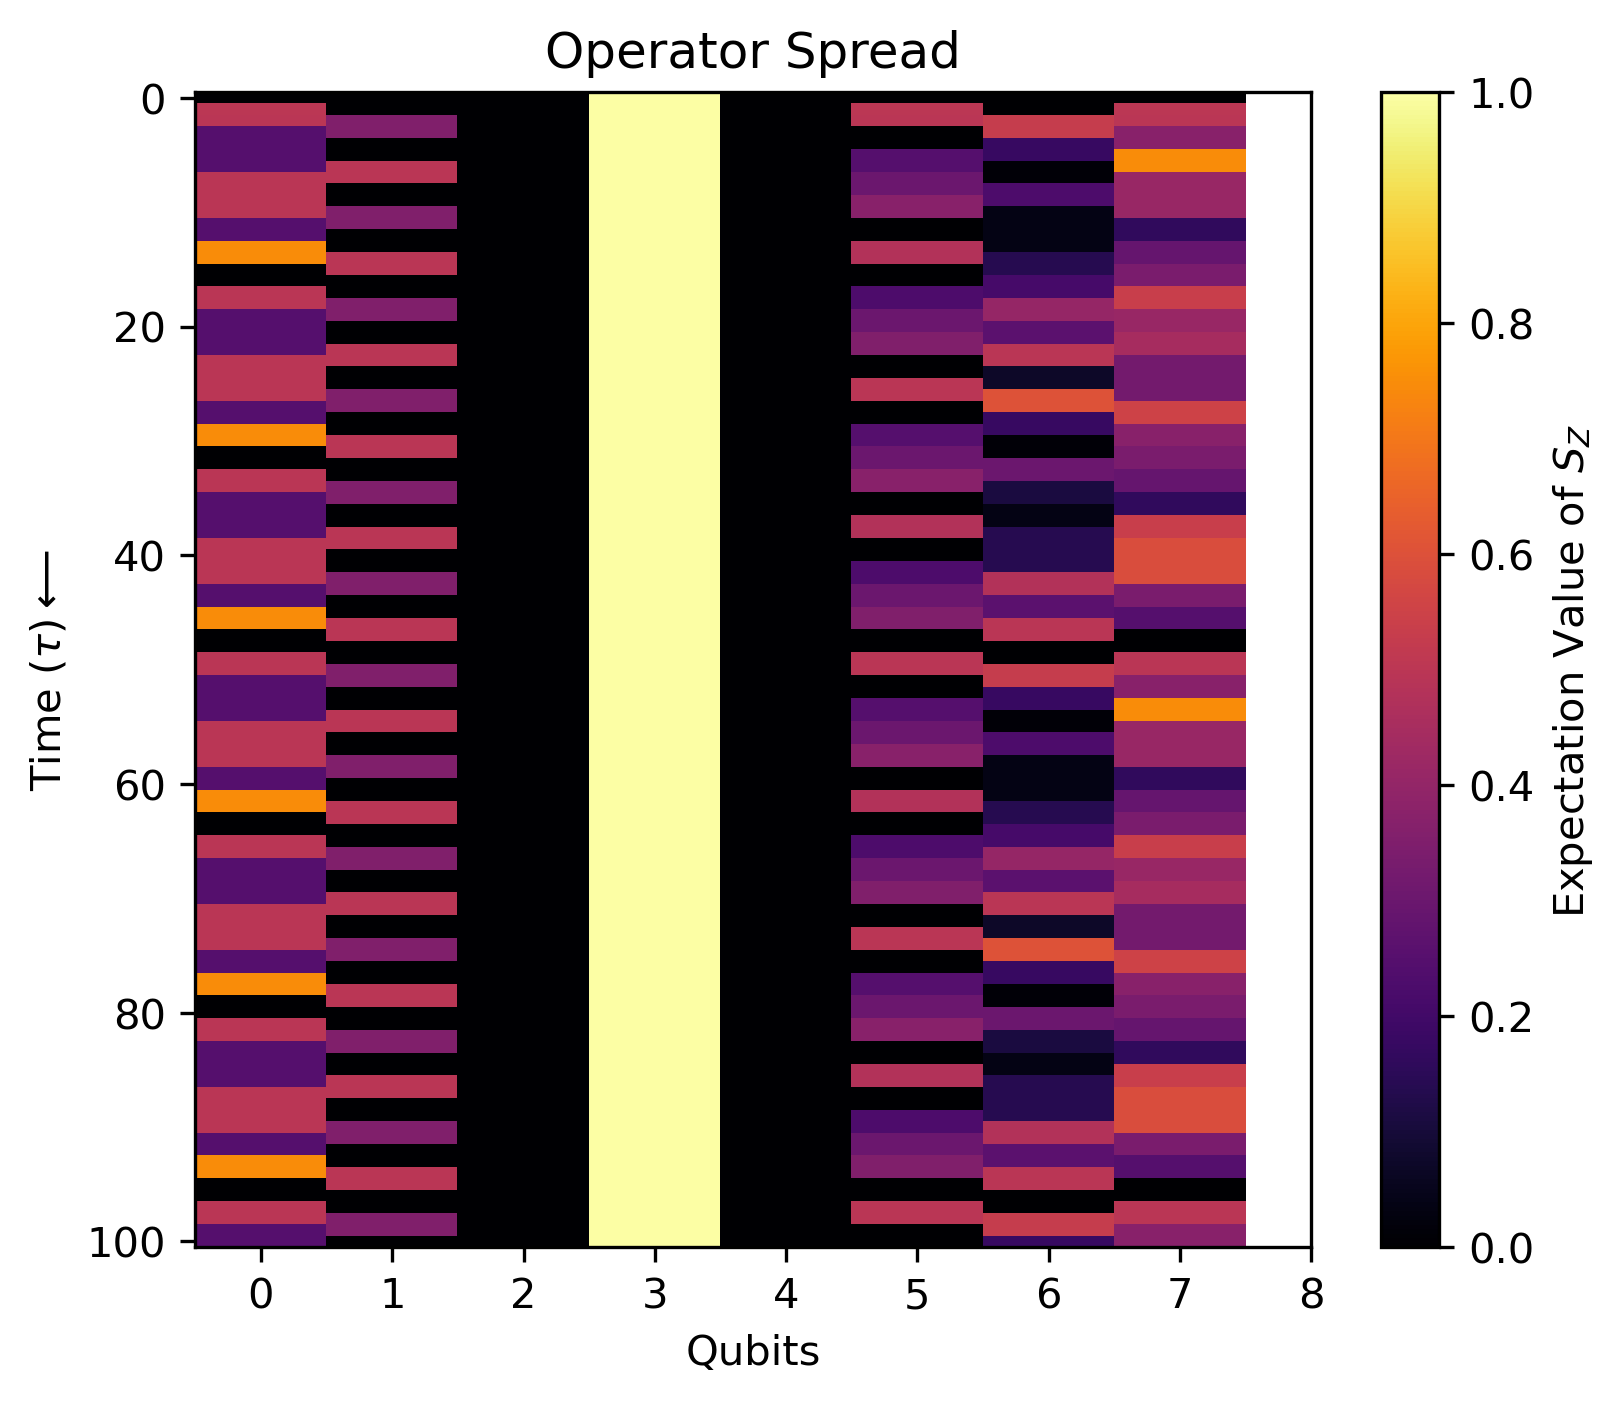

In [19]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

HC =  np.array([[1, 0, 0, 0],
               [0, 1/np.sqrt(2), 0, 1/np.sqrt(2)],
               [0, 0, 1, 0],
               [0, 1/np.sqrt(2), 0, -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(r, l), r), u), r), l), r), l)  # Initial state

# Define the state evolution function
def state_evolution(state, no_of_generations):
    odd_gen_mat = kron(kron(kron(HC, HC), CH), CH)
    even_gen_mat = kron(kron(kron(Id, HC), CH), kron(CH, Id))
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state


# Define the expectation value function
def expectation_value(state, operator):
    # Calculate the expectation value of the operator with the given state
    expectation = np.dot(np.conj(state).T, np.dot(operator, state))
    return np.abs(expectation) if np.abs(expectation) >= 1e-10 else 0

# Define the Sz matrices for the chain
Sz1 = kron(kron(kron(kron(kron(kron(kron(Sz, Id), Id), Id), Id), Id), Id), Id)
Sz2 = kron(kron(kron(kron(kron(kron(kron(Id, Sz), Id), Id), Id), Id), Id), Id)
Sz3 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Sz), Id), Id), Id), Id), Id)
Sz4 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Sz), Id), Id), Id), Id)
Sz5 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Sz), Id), Id), Id)
Sz6 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Sz), Id), Id)
Sz7 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Sz), Id)
Sz8 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Sz)

# Define the list of operators
operator_list = [Sz1, Sz2, Sz3, Sz4, Sz5, Sz6, Sz7, Sz8]

def expectation_value_chain(state, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    expectation_cells = np.zeros(no_of_qubits)
    for i in range(no_of_qubits):
        expectation_cells[i] = abs(expectation_value(state, list_of_operators[i]))
    return expectation_cells

def generate_matrix(state, generation, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    matrix_expect = np.zeros((generation + 1, no_of_qubits))
    matrix_expect[0, :] = expectation_value_chain(state, list_of_operators)
    for i in range(1, generation + 1):
        gen_state = state_evolution(state, i)
        matrix_expect[i, :] = expectation_value_chain(gen_state, list_of_operators)
    return matrix_expect

operator_spread = generate_matrix(ψ, 100, operator_list)

#Plotting the heatmap
plt.figure(figsize=(6, 5), dpi=300)
plt.imshow(operator_spread, cmap='inferno', aspect='auto')
plt.colorbar(label="Expectation Value of $S_Z$")
plt.xlabel("Qubits")
plt.ylabel("Time $(\\tau) \\longleftarrow$")
plt.xticks(np.arange(0, 9, step=1))
#plt.yticks(np.arange(0, operator_spread.shape[0], step=1))
plt.title("Operator Spread")
plt.savefig("spread-S")



In [15]:
CH = [[1, 0],
      [0, 1/np.sqrt(2), 1/np.sqrt(2)],
      [1/np.sqrt(2), 1/np.sqrt(2), -1/np.sqrt(2)]]
print(CH)

[[1, 0], [0, 0.7071067811865475, 0.7071067811865475], [0.7071067811865475, 0.7071067811865475, -0.7071067811865475]]


In [16]:
a = kron(u,d)
print(a)

[[0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]]


# Operator Spread with Periodic Boundary Condition

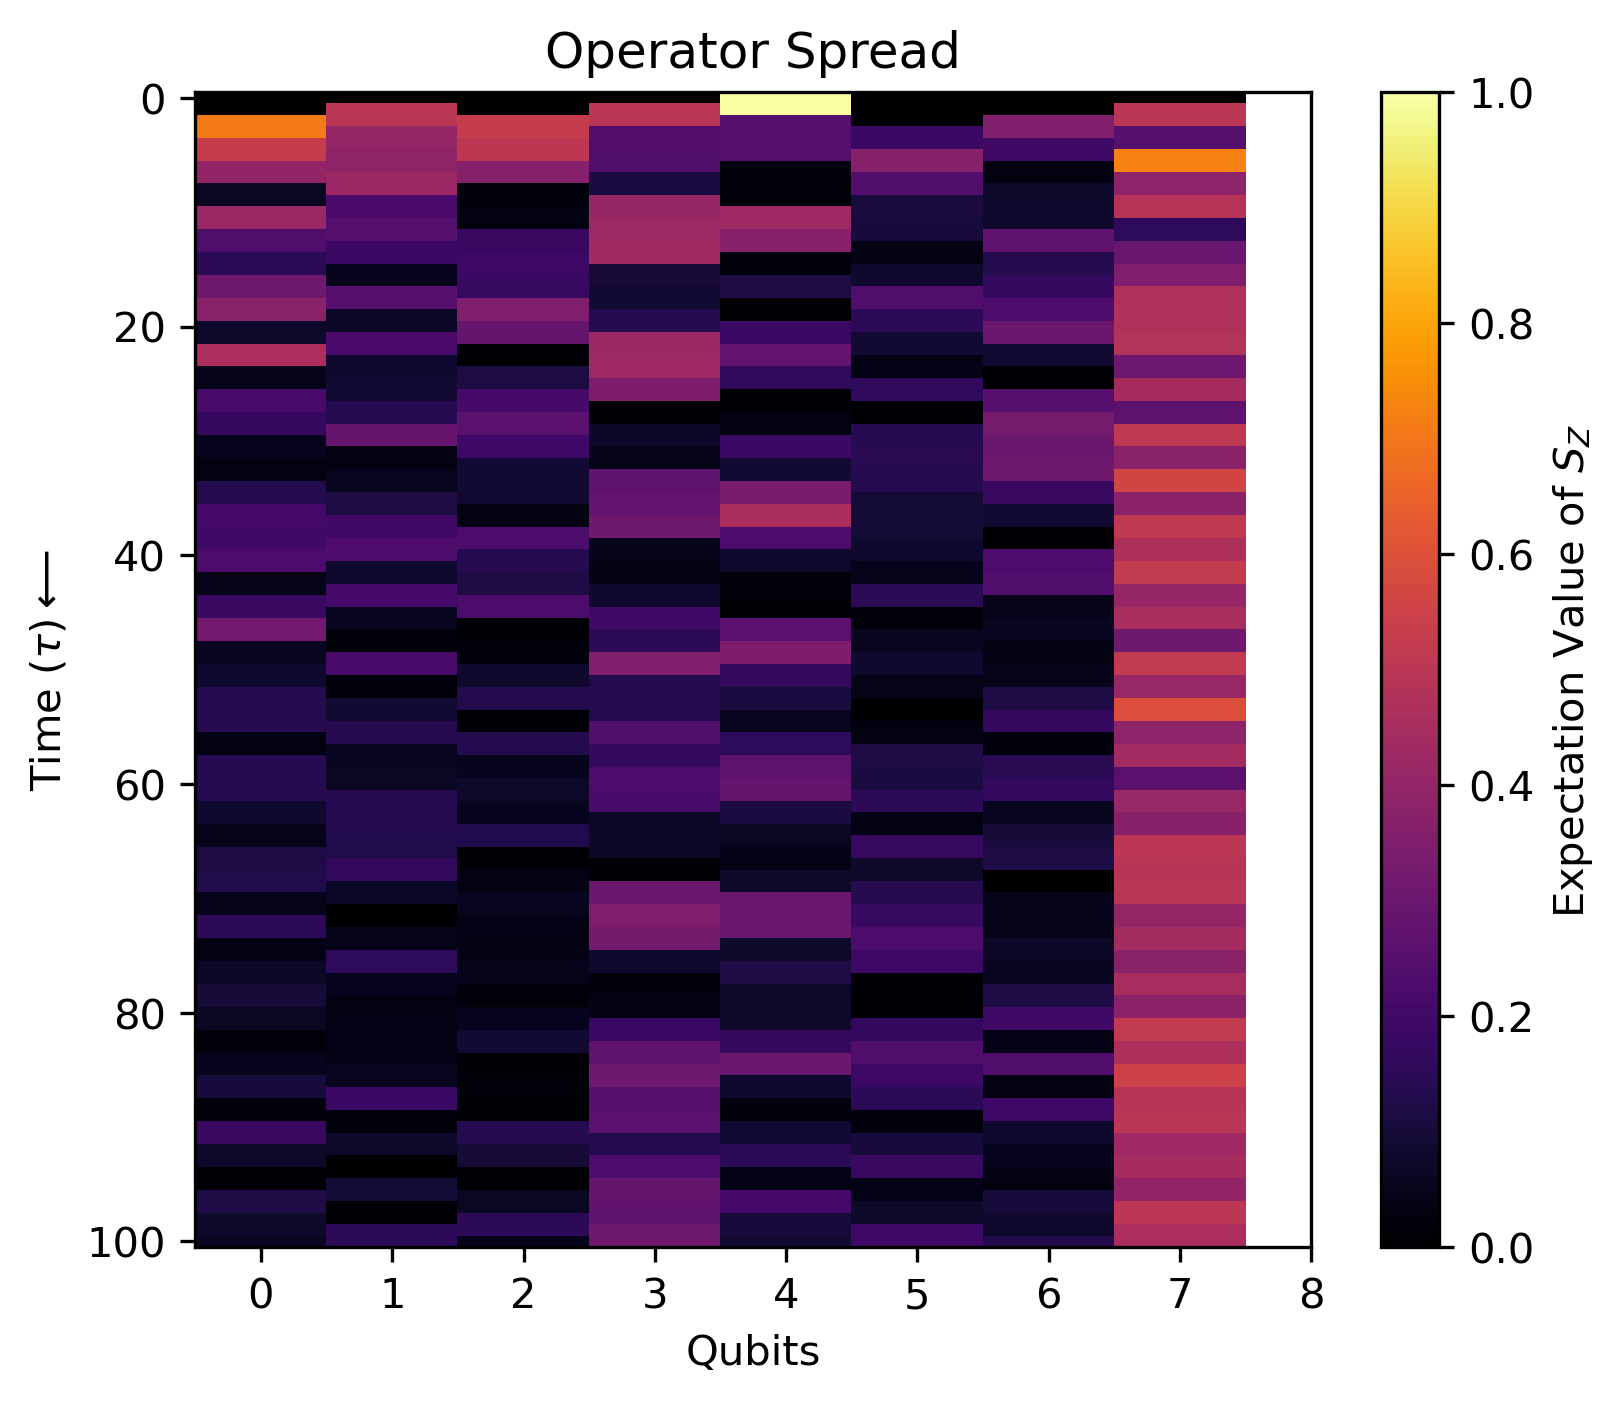

In [11]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
C_ = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]], dtype=complex)
H_ = np.array([[0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(r, l), r), l), u), l), r), l)  # Initial state

# Define the state evolution function
def state_evolution(state, no_of_generations):
    odd_gen_mat = kron(kron(kron(CH, CH), CH), CH)
    even_gen_mat = kron(kron(kron(H, CH), CH), kron(CH, Id))
    counter = 0
    final_state = state
    while counter < no_of_generations:
        counter += 1
        if counter % 2 == 1:
            final_state = odd_gen_mat @ final_state
        else:
            final_state = even_gen_mat @ final_state
    return final_state

# Define the expectation value function
def expectation_value(state, operator):
    # Calculate the expectation value of the operator with the given state
    expectation = np.dot(np.conj(state).T, np.dot(operator, state))
    return np.abs(expectation) if np.abs(expectation) >= 1e-10 else 0

# Define the Sz matrices for the chain
Sz1 = kron(kron(kron(kron(kron(kron(kron(Sz, Id), Id), Id), Id), Id), Id), Id)
Sz2 = kron(kron(kron(kron(kron(kron(kron(Id, Sz), Id), Id), Id), Id), Id), Id)
Sz3 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Sz), Id), Id), Id), Id), Id)
Sz4 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Sz), Id), Id), Id), Id)
Sz5 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Sz), Id), Id), Id)
Sz6 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Sz), Id), Id)
Sz7 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Sz), Id)
Sz8 = kron(kron(kron(kron(kron(kron(kron(Id, Id), Id), Id), Id), Id), Id), Sz)

# Define the list of operators
operator_list = [Sz1, Sz2, Sz3, Sz4, Sz5, Sz6, Sz7, Sz8]

def expectation_value_chain(state, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    expectation_cells = np.zeros(no_of_qubits)
    for i in range(no_of_qubits):
        expectation_cells[i] = abs(expectation_value(state, list_of_operators[i]))
    return expectation_cells

def generate_matrix(state, generation, list_of_operators):
    no_of_qubits = int(np.log2(len(state)))
    matrix_expect = np.zeros((generation + 1, no_of_qubits))
    matrix_expect[0, :] = expectation_value_chain(state, list_of_operators)
    for i in range(1, generation + 1):
        gen_state = state_evolution(state, i)
        matrix_expect[i, :] = expectation_value_chain(gen_state, list_of_operators)
    return matrix_expect

operator_spread = generate_matrix(ψ, 100, operator_list)

#Plotting the heatmap
plt.figure(figsize=(6, 5), dpi=300)
plt.imshow(operator_spread, cmap='inferno', aspect='auto')
plt.colorbar(label="Expectation Value of $S_Z$")
plt.xlabel("Qubits")
plt.ylabel("Time $(\\tau) \\longleftarrow$")
plt.xticks(np.arange(0, 9, step=1))
#plt.yticks(np.arange(0, operator_spread.shape[0], step=1))
plt.title("Operator Spread")
plt.savefig("spread-S")



In [6]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt

# Define the ket function to create basis vectors
def ket(pos, dim):
    vec = np.zeros((dim, 1), dtype=complex)
    vec[pos-1, 0] = 1
    return vec

# Define the initial states
u, d = ket(1, 2), ket(2, 2)
r, l = 1 / np.sqrt(2) * (u + d), 1 / np.sqrt(2) * (u - d)

# Define the identity matrix and Pauli matrices
Id = np.eye(2, dtype=int)
X = np.array([[0, 1], [1, 0]], dtype=int)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=int)
H = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=int)

# Define the controlled-Hadamard gate
CH = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]], dtype=complex)
H_ = np.array([[0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)
C_ = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
               [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)]], dtype=complex)

# Define the Pauli Z matrix
Sz = np.array([[1, 0], [0, -1]], dtype=int)  # Pauli Matrix Z

# Define the initial state
ψ = kron(kron(kron(kron(kron(kron(kron(r, l), r), l), u), l), r), l)  # Initial state

even_gen_mat = kron(kron(kron(H_, CH), CH), kron(CH, C_))

In [5]:
print((even_gen_mat))

NameError: name 'dim' is not defined